In [ ]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


In [ ]:
digits = load_digits()
data = digits.images
binary_data = (data>7).astype(int)

n_samples, width, height = binary_data.shape


In [ ]:
num_clusters = 3
bgm = BayesianGaussianMixture(n_components = num_clusters,covariance_type='full',max_iter=10000)

bgm.fit(binary_data.reshape(n_samples,width*height))


BayesianGaussianMixture(max_iter=10000, n_components=3)

In [ ]:
mixing_coeffs = bgm.weights_
cluster_probs = bgm.means_

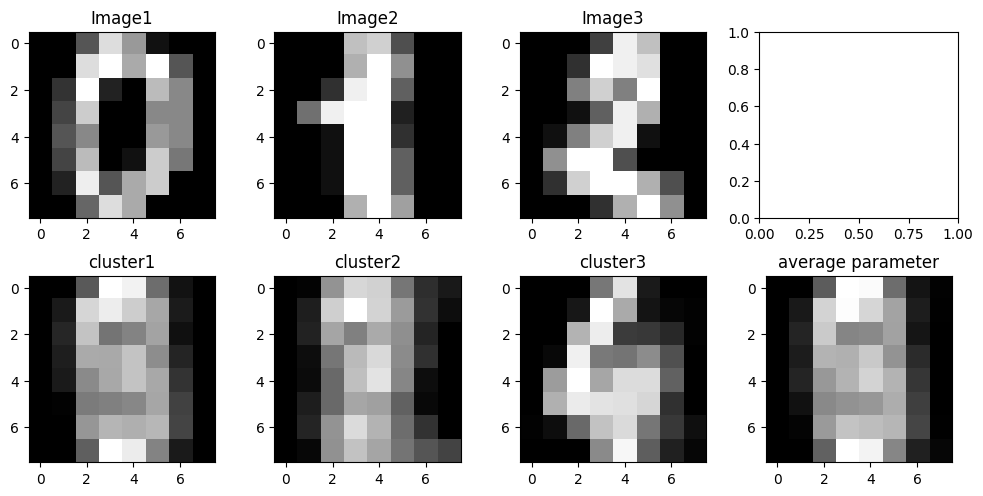

In [ ]:
fig, axes = plt.subplots(2,num_clusters+1,figsize = (10,5))
for i in range(num_clusters):
  axes[0,i].imshow(data[i], cmap='gray')
  axes[0,i].set_title(f'Image{i+1}')
for i in range(num_clusters):
  axes[1,i].imshow(cluster_probs[i].reshape(width,height),cmap='gray')
  axes[1,i].set_title(f'cluster{i+1}')


ave = np.mean(binary_data.reshape(n_samples,width*height),axis=0)
axes[1,num_clusters].imshow(ave.reshape(width,height),cmap='gray')
axes[1,num_clusters].set_title('average parameter')

plt.tight_layout()
plt.show()
